<a href="https://colab.research.google.com/github/raminhaghjou/Real-Time-Object-Tracking-with-DeepSORT-and-YOLOv8/blob/main/Object_Detection_using_YOLOv8_and_Real_time_Object_Tracking_using_DeepSORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection Using YOLOv8 on a Custom Dataset

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/raminhaghjou/object_detection_using_yolov8)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

In this tutorial, I will learn how to perform object detection and tracking with YOLOv8 and DeepSORT.

We will use the Ultralytics implementation of YOLOv8 which is implemented in PyTorch. So the YOLO model will be used for object detection and the DeepSORT algorithm will be used to track those detected objects.

A tracker can help to identify the same object and assign it a unique ID from frame to frame even when the object detector fails to detect the object in some frames (e.g. when the object is occluded).

DeepSORT is a deep learning-based algorithm for object tracking that was introduced in 2017 in the paper Simple Online and Realtime Tracking with a Deep Association Metric by Nicolai Wojke, Alex Bewley, and Dietrich Paulus.

DeepSORT is based on the SORT algorithm that utilizes a combination of a Kalman filter for prediction and a Hungarian algorithm for data association. However, DeepSORT improves upon SORT by incorporating a deep appearance descriptor to improve the matching of objects over time.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **19.05.2023** with version **YOLOv8.0.105**.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Step1: Object Detection with YOLOv8 and OpenCV
- Step2: Real Time Object Tracking with DeepSORT and YOLOv8

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat May 27 07:55:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **19.05.2023** with version **YOLOv8.0.105**.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.105

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n-seg.pt conf=0.25 source='https://www.rcp-vision.com/wp-content/uploads/2020/06/800px-Lex_Av_E_92_St_06.jpg' save=true

/content
100% 6.73M/6.73M [00:00<00:00, 81.6MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

100% 164k/164k [00:00<00:00, 666kB/s] 
image 1/1 /content/800px-Lex_Av_E_92_St_06.jpg: 480x640 6 cars, 1 bus, 79.8ms
Speed: 11.2ms preprocess, 79.8ms inference, 300.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


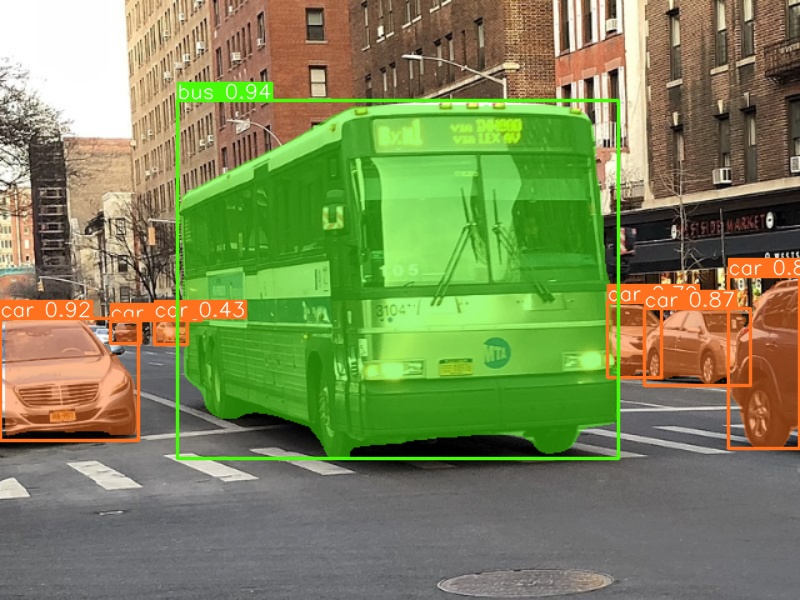

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/800px-Lex_Av_E_92_St_06.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8l-seg.pt conf=0.25 source='/content/6cefPQPvrp77CcrZKNMDwg-1200-80.jpg' save=true

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients

image 1/1 /content/6cefPQPvrp77CcrZKNMDwg-1200-80.jpg: 384x640 2 cats, 1 bowl, 3 chairs, 3 couchs, 3 potted plants, 3 vases, 81.8ms
Speed: 9.6ms preprocess, 81.8ms inference, 79.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


/content


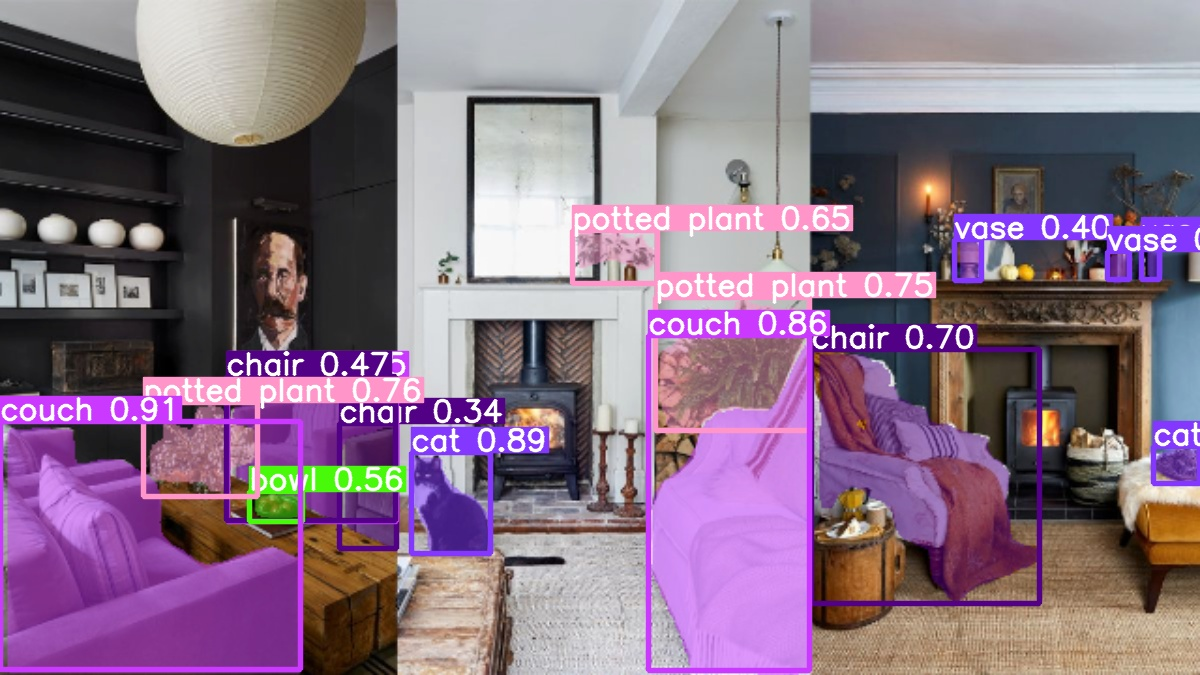

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict4/6cefPQPvrp77CcrZKNMDwg-1200-80.jpg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://www.rcp-vision.com/wp-content/uploads/2020/06/800px-Lex_Av_E_92_St_06.jpg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 85.4MB/s]

Found https://www.rcp-vision.com/wp-content/uploads/2020/06/800px-Lex_Av_E_92_St_06.jpg locally at 800px-Lex_Av_E_92_St_06.jpg
image 1/1 /content/800px-Lex_Av_E_92_St_06.jpg: 480x640 7 cars, 1 bus, 64.8ms
Speed: 3.2ms preprocess, 64.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[1.7973e+02, 1.0053e+02, 6.1948e+02, 4.6044e+02],
        [3.6793e-01, 3.1746e+02, 1.3753e+02, 4.3928e+02],
        [6.4503e+02, 3.0910e+02, 7.5161e+02, 3.8493e+02],
        [7.3064e+02, 2.7557e+02, 7.9955e+02, 4.4987e+02],
        [6.0870e+02, 3.0355e+02, 6.6115e+02, 3.7704e+02],
        [1.1053e+02, 3.2267e+02, 1.4447e+02, 3.4399e+02],
        [1.5602e+02, 3.1792e+02, 1.7840e+02, 3.4432e+02],
        [1.5663e+02, 3.1955e+02, 1.8748e+02, 3.4410e+02]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.9511, 0.9167, 0.8610, 0.8474, 0.7221, 0.4222, 0.3415, 0.3360], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([5., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')

In [ ]:
!pip install supervision==0.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step1: Object Detection with YOLOv8 and OpenCV

**Helper Function**

In [ ]:
import cv2

def create_video_writer(video_cap, output_filename):

    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))

    return writer

# Object Detection

In [ ]:
import datetime
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow


def create_video_writer(video_cap, output_filename):

    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))

    return writer


# define some constants
CONFIDENCE_THRESHOLD = 0.8
GREEN = (0, 255, 0)

# initialize the video capture object
video_cap = cv2.VideoCapture("2.mp4")
# initialize the video writer object
writer = create_video_writer(video_cap, "output.mp4")

# load the pre-trained YOLOv8n model
model = YOLO("yolov8n.pt")


while True:
    # start time to compute the fps
    start = datetime.datetime.now()

    ret, frame = video_cap.read()

    # if there are no more frames to process, break out of the loop
    if not ret:
        break

    # run the YOLO model on the frame
    detections = model(frame)[0]

    # loop over the detections
    for data in detections.boxes.data.tolist():
        # extract the confidence (i.e., probability) associated with the detection
        confidence = data[4]

        # filter out weak detections by ensuring the 
        # confidence is greater than the minimum confidence
        if float(confidence) < CONFIDENCE_THRESHOLD:
            continue

        # if the confidence is greater than the minimum confidence,
        # draw the bounding box on the frame
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        cv2.rectangle(frame, (xmin, ymin) , (xmax, ymax), GREEN, 2)

    # end time to compute the fps
    end = datetime.datetime.now()
    # show the time it took to process 1 frame
    total = (end - start).total_seconds()
    print(f"Time to process 1 frame: {total * 1000:.0f} milliseconds")

    # calculate the frame per second and draw it on the frame
    fps = f"FPS: {1 / total:.2f}"
    cv2.putText(frame, fps, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    # show the frame to our screen
    # cv2_imshow("Frame", frame)
    cv2_imshow(frame)
    writer.write(frame)
    if cv2.waitKey(1) == ord("q"):
        break

video_cap.release()
writer.release()
cv2.destroyAllWindows()

# Step2: Real Time Object Tracking with DeepSORT and YOLOv8

In [ ]:
!pip install deep-sort-realtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 64.6 MB/s eta 0:00:00


In [ ]:

import datetime
from ultralytics import YOLO
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort
from google.colab.patches import cv2_imshow


def create_video_writer(video_cap, output_filename):

    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))

    return writer


CONFIDENCE_THRESHOLD = 0.8
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

# initialize the video capture object
video_cap = cv2.VideoCapture("2.mp4")
# initialize the video writer object
writer = create_video_writer(video_cap, "output.mp4")

# load the pre-trained YOLOv8n model
model = YOLO("yolov8n.pt")
tracker = DeepSort(max_age=50)


while True:
    start = datetime.datetime.now()

    ret, frame = video_cap.read()

    if not ret:
        break

    # run the YOLO model on the frame
    detections = model(frame)[0]

    # initialize the list of bounding boxes and confidences
    results = []

    ######################################
    # DETECTION
    ######################################

    # loop over the detections
    for data in detections.boxes.data.tolist():
        # extract the confidence (i.e., probability) associated with the prediction
        confidence = data[4]

        # filter out weak detections by ensuring the 
        # confidence is greater than the minimum confidence
        if float(confidence) < CONFIDENCE_THRESHOLD:
            continue

        # if the confidence is greater than the minimum confidence,
        # get the bounding box and the class id
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])
        # add the bounding box (x, y, w, h), confidence and class id to the results list
        results.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    ######################################
    # TRACKING
    ######################################

    # update the tracker with the new detections
    tracks = tracker.update_tracks(results, frame=frame)
    # loop over the tracks
    for track in tracks:
        # if the track is not confirmed, ignore it
        if not track.is_confirmed():
            continue

        # get the track id and the bounding box
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(
            ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # draw the bounding box and the track id
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.rectangle(frame, (xmin, ymin - 20), (xmin + 20, ymin), GREEN, -1)
        cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, WHITE, 2)

    # end time to compute the fps
    end = datetime.datetime.now()
    # show the time it took to process 1 frame
    print(f"Time to process 1 frame: {(end - start).total_seconds() * 1000:.0f} milliseconds")
    # calculate the frame per second and draw it on the frame
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    # show the frame to our screen
    # cv2.imshow("Frame", frame)
    cv2_imshow(frame)
    writer.write(frame)
    if cv2.waitKey(1) == ord("q"):
        break

video_cap.release()
writer.release()
cv2.destroyAllWindows()